# **Industrial Applications of Linear Regression**



```
Me: Hi, How are you doing ?
You: Great, what's going to learn ?

Me: We are going to explore *industrial application of linear regression*.
You: Great, will you give some explanation with *implementation* ?

Me: Yes, we will.
You: Before move, let's first discuss what kind of data we can analyse using linear regression.

Me: In linear regression the the feature value should be independent to each other.
You: Means, correlation between X1 | X2 should be 0.


Me: Let me give just a blink of industrial application of linear regression
```


1. **Understanding Relationships in Data**: Businesses need to comprehend relationships within their data to make strategic, data-driven decisions and reduce reliance on assumptions and guesswork.
   
2. **Predicting Consumer Behavior**: Businesses require methods to predict consumer behavior and purchasing trends to remain profitable and allocate resources effectively.

3. **Demand Forecasting**: Organizations need tools to predict peaks and valleys in demand, assisting with budgeting and inventory management.

4. **Optimizing Advertising Spend**: Companies need to determine the best allocation of advertising budgets across various mediums (TV, banner ads, print) to maximize revenue and return on investment (ROI).

5. **Analyzing Price Elasticity**: Businesses need to understand the relationship between price changes and sales volume to optimize pricing strategies.

6. **Improving Athlete Performance**: Sports teams need to evaluate the effects of training programs (e.g., yoga, weightlifting) on player performance and game outcomes.

7. **Adjusting Prescription Dosage**: In the medical field, healthcare providers need to analyze the relationship between drug dosages and patient outcomes (e.g., vital signs) to adjust treatments effectively.

8. **Prioritizing Business Operations**: Small businesses need to prioritize areas of their operations, identifying which areas to focus on and which can be scaled back without affecting overall workflow.

9. **Optimizing Supply Chain**: Companies need to efficiently allocate resources within their supply chain to cut costs and improve profitability.

10. **Avoiding False Positives and Overfitting**: Businesses must be cautious of using a limited number of variables in their analysis, which can lead to misleading results, such as false positives or overfitting in the model.


**1. Understanding Relationships in Data**

```
Me: Let's assume a simple example and understand the relationships in data
You: Yes
```



In [38]:
import pandas as pd

'''
Me: Do you know how to create DataFrame ?
You: Yes
'''

data = {
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    'Product ID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'Product': ['Laptop', 'Smartphone', 'Coffee Maker', 'Headphones', 'Blender'],
    'Category': ['Electronics', 'Electronics', 'Home Appliance', 'Electronics', 'Home Appliance'],
    'Price': [1000, 800, 200, 200, 100],
    'Quantity Sold': [2, 5, 10, 7, 20],
    'Revenue': [2000, 4000, 1500, 1400, 2000],
    'Customer Age': [28, 35, 40, 22, 30],
    'Customer Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Store Location': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'San Francisco']
}

# Create a DataFrame
df = pd.DataFrame(data)
df


,Date,Product ID,Product,Category,Price,Quantity Sold,Revenue,Customer Age,Customer Gender,Store Location
0,2024-01-01,P001,Laptop,Electronics,1000,2,2000,28,Male,New York
1,2024-01-01,P002,Smartphone,Electronics,800,5,4000,35,Female,Los Angeles
2,2024-01-02,P003,Coffee Maker,Home Appliance,200,10,1500,40,Female,Chicago
3,2024-01-02,P004,Headphones,Electronics,200,7,1400,22,Male,Houston
4,2024-01-03,P005,Blender,Home Appliance,100,20,2000,30,Female,San Francisco




```
Me: Let's analyze


1A.   Distribution
1B.   Categorical Distribution
1C.   2D Distribution
1D.   Time Series
1E.   Values
1F.   2D Categorical Distribution

You: I think it will give an overview of big data.


Me: Yes


```



In [39]:
from matplotlib import pyplot as plt

**1A. Distribution**
Data Type: Continuous or numerical

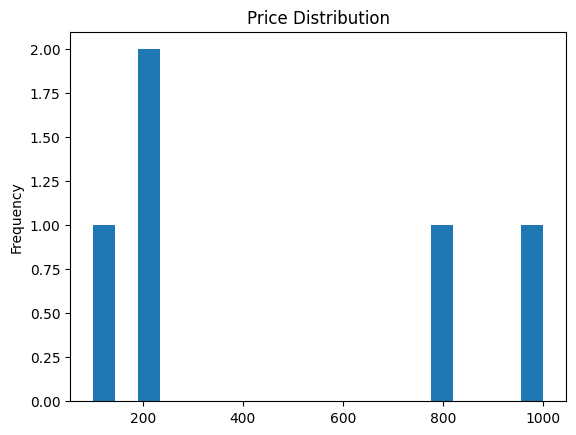

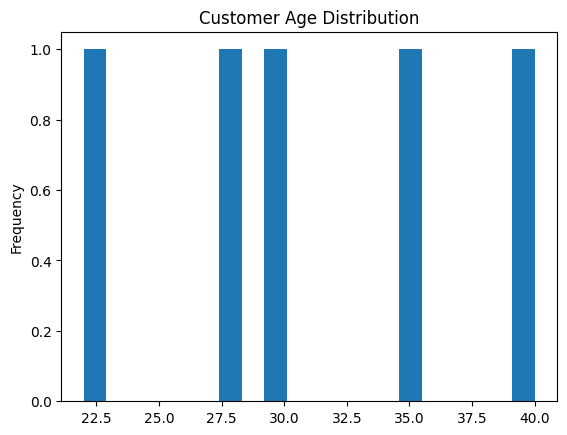

In [40]:
# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Now you can plot histograms for numeric columns
# Example for 'Price':
df['Price'].plot(kind='hist', bins=20, title='Price Distribution')
plt.show()

# Example for Customer Age:
df['Customer Age'].plot(kind='hist', bins=20, title='Customer Age Distribution')
plt.show()



**1B. Categorical or Discrete Distribution**


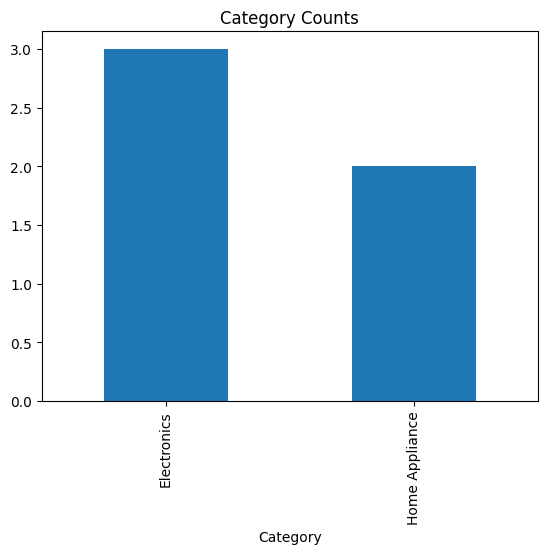

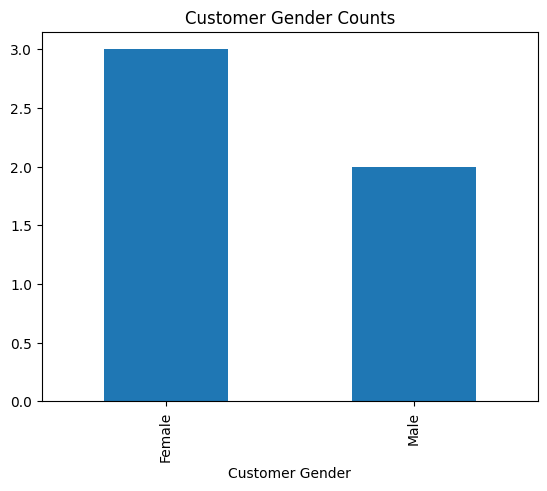

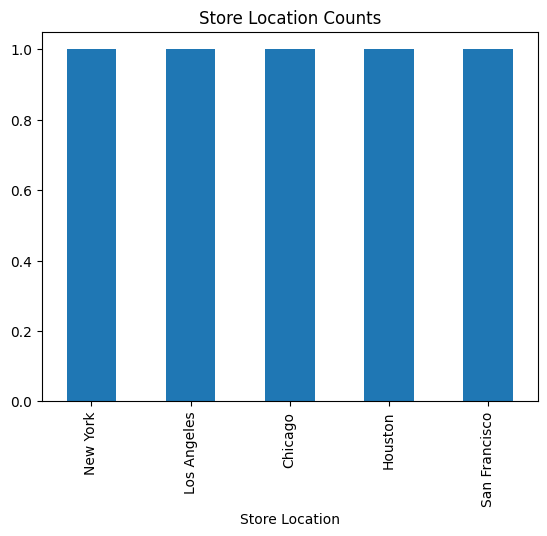

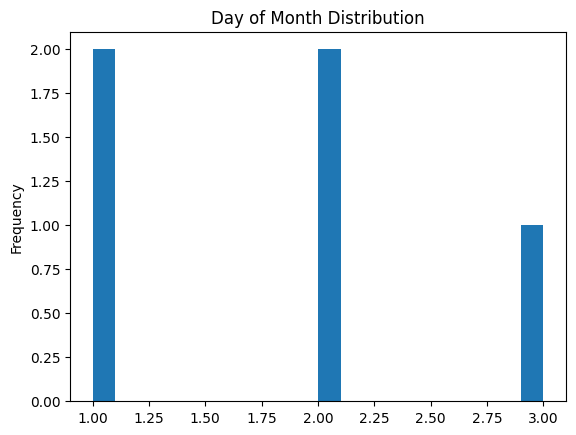

In [41]:

# Category
df['Category'].value_counts().plot(kind='bar', title='Category Counts')
plt.show()
# Customer Gender
df['Customer Gender'].value_counts().plot(kind='bar', title='Customer Gender Counts')
plt.show()
# Store Location
df['Store Location'].value_counts().plot(kind='bar', title='Store Location Counts')
plt.show()

# if you want to plot Date, you could extract day, month, or year as numeric values:
# Example for extracting the day of the month:
df['Day'] = df['Date'].dt.day
df['Day'].plot(kind='hist', bins=20, title='Day of Month Distribution')
plt.show()



```
You: Why have you used histogram and bar chart

Me: Basically,

Bar Chart: Data Type: categorical or dicrete data
Histogram: Data Type: continuous or numerical data
```



**1C. 2D Distribution**

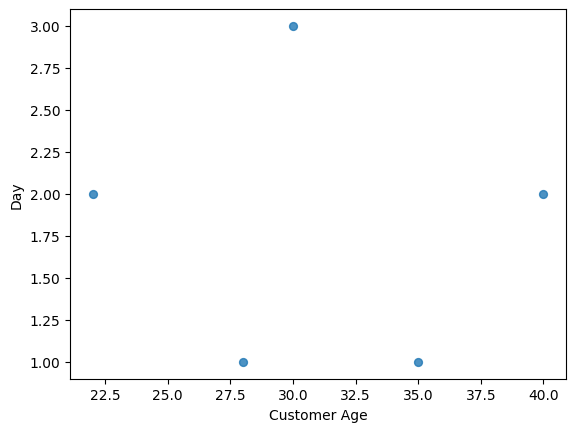

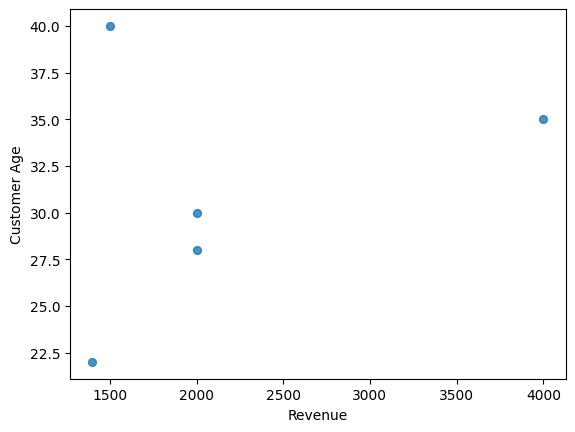

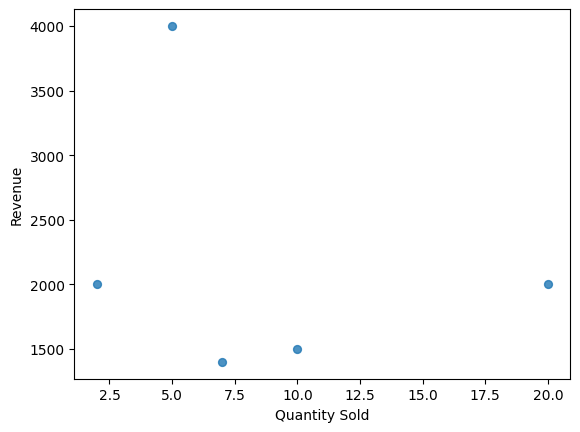

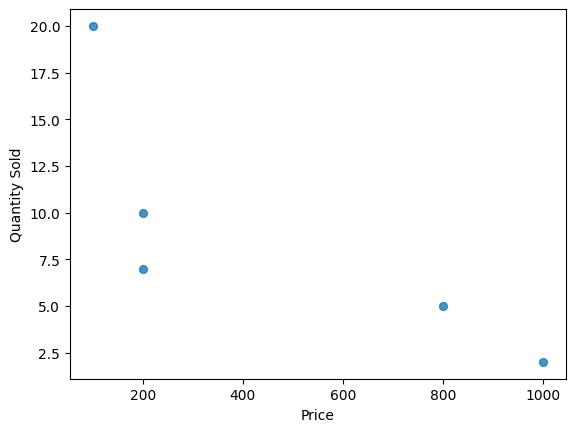

In [42]:
df.plot(kind='scatter', x='Customer Age', y='Day', s=32, alpha=.8)
plt.show()
df.plot(kind='scatter', x='Revenue', y='Customer Age', s=32, alpha=.8)
plt.show()
df.plot(kind='scatter', x='Quantity Sold', y='Revenue', s=32, alpha=.8)
plt.show()
df.plot(kind='scatter', x='Price', y='Quantity Sold', s=32, alpha=.8)
plt.show()


**1D. Time Series**

In [43]:

import seaborn as sns

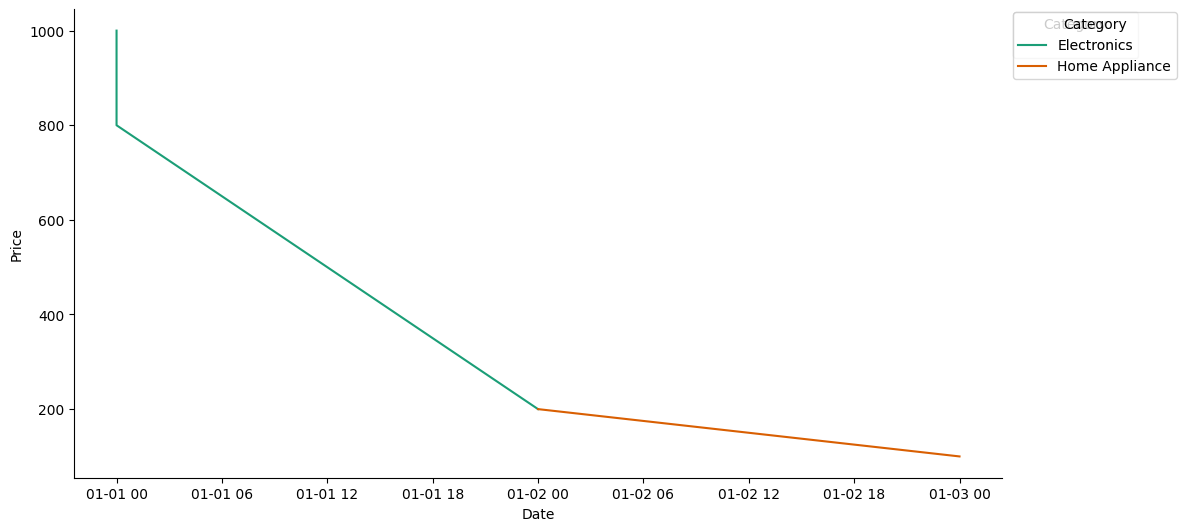

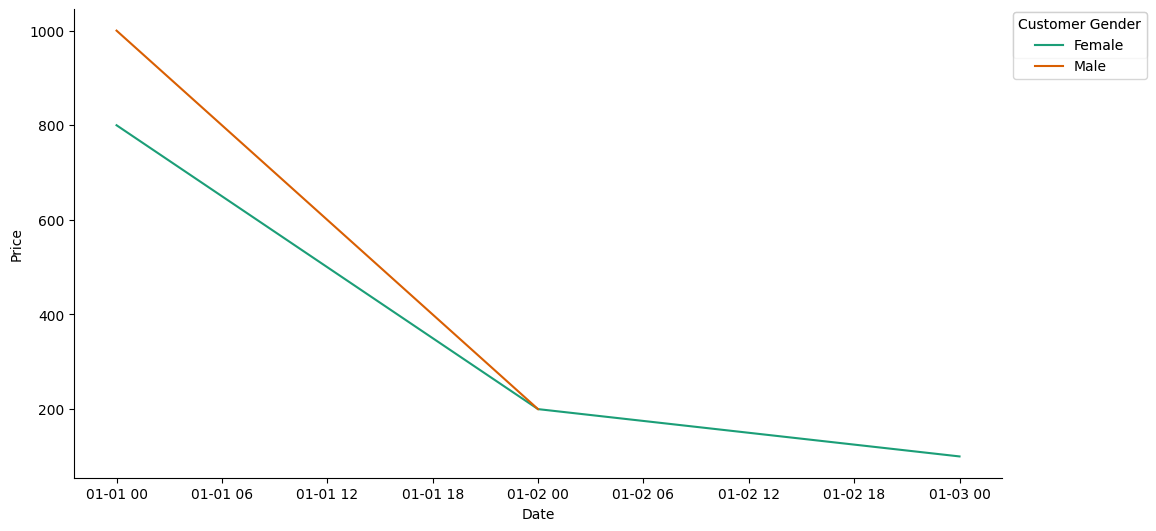

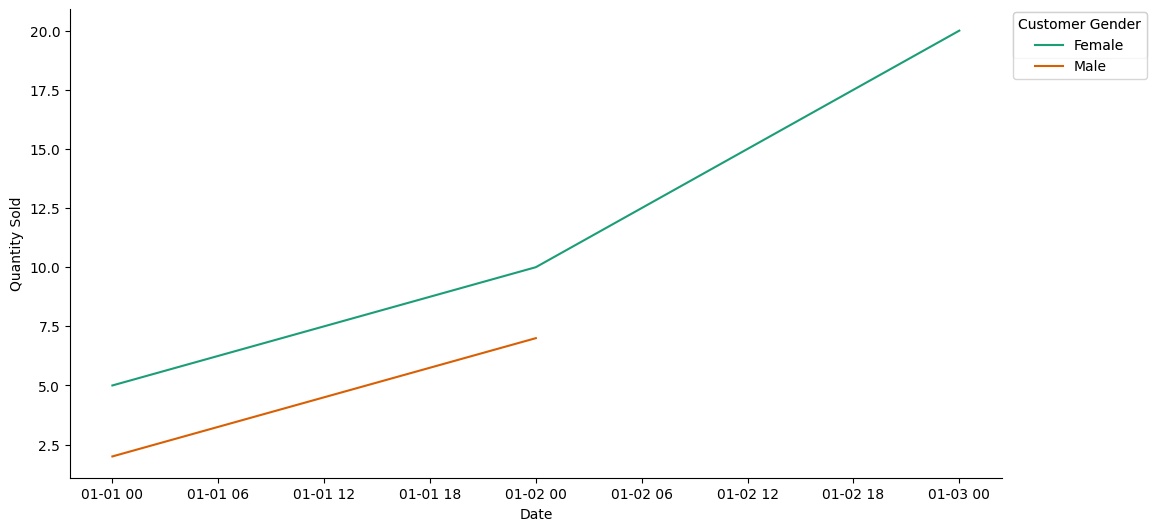

In [44]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')


plt.show()


def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

plt.show()



def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Quantity Sold']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Quantity Sold')



```
You: In plots graph is not linears,
Me: Yes, that is why we can't use linear regression on the feature where Xs and Y are not following linear trend, but some extend we can use it


Me: Let's explore "Predicting Medicine Dose"
You: I remember, doctors says you should eat half from this tablet, full from this tablet.

Me: Yes, this is simplest way, this idea can be use to prescribe personalized medicine dose based on previous record.
You: Ohk
```



# **Personalized Prediction of Fever Medicine Dose**

Steps:


1.   Preparing Dataset
2.   Splitting Data into train and test
3.   Train model (finding weights and biases)
4.   Test model (predicting)
5.   Model Evaluation



**1. Preparing Dataset**

In [47]:
data = {
    'Fever in Fahrenheit': [99.0, 99.5, 100.0, 100.5, 101.0, 101.5, 102.0, 102.5, 103.0, 103.5, 104.0, 104.5, 105.0],
    'Dose (mg)': [250, 250, 500, 500, 500, 750, 750, 1000, 1000, 1250, 1250, 1500, 1500]
}


df = pd.DataFrame(data)
df

,Fever in Fahrenheit,Dose (mg)
0,99.0,250
1,99.5,250
2,100.0,500
3,100.5,500
4,101.0,500
5,101.5,750
6,102.0,750
7,102.5,1000
8,103.0,1000
9,103.5,1250




```
Me: We can use the linear regression model which we have implemented in Module 1 Topic 1 Stage 1
But there is a built in library.

You: Ok so let's use that

Me: Also let's break our dataset into train (80%) and test (20%)
You: Ok
```



**2. Splitting Dataset into train and test**


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Define features (Fever) and target (Dose)
X = df[['Fever in Fahrenheit']]
y = df['Dose (mg)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Train Model**

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

**4. Test Model**

In [54]:
# Predict the Dose for the test data
y_pred = model.predict(X_test)




**5. Model Evaluation**

In [58]:
# Compare actual vs predicted doses
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


    Actual    Predicted
11    1500  1363.799283
9     1250  1146.953405
0      250   171.146953




```
Me:    
id    Actual    Predicted
11    1500      1363.799283
9     1250      1146.953405
0     250       171.146953

You: What it is saying ?

Me:
y_test for id = 11 was 1500, but after training the model and predicting from the model by passing the Fever it is saying dose should be 1363.79 mg

You: Oh, yes

Me: It's means there is an error,
You: Yes, how to remove the error,

Me: We can't remove the error completely, we can only minimize the error
You: Ok,

Me: Since linear regression follow the following mathematical model:
y = mx + c
You: yes, I think mathematical model may be having limitations

Me: Yes, In that case to get better accuracy we have to use different mathematical model rather than linear regression.
You: yes

```



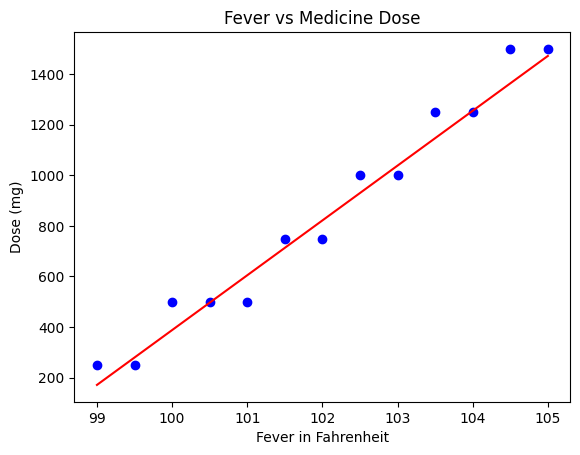

'\nMe: Red line is our trained model,\nYou: Blue points are actual values\n\n\nMe: Yes\n\n'

In [59]:
# Plot the Fever vs Dose
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Fever vs Medicine Dose')
plt.xlabel('Fever in Fahrenheit')
plt.ylabel('Dose (mg)')
plt.show()


'''
Me: Red line is our trained model,
You: Blue points are actual values


Me: Yes

'''

**Mean Squere Error | R-Square (R2 - score) | Mean Absolute Error (MAE)**



```
Me: Have you heard about above ?
You: Yes, let me give you formula
```
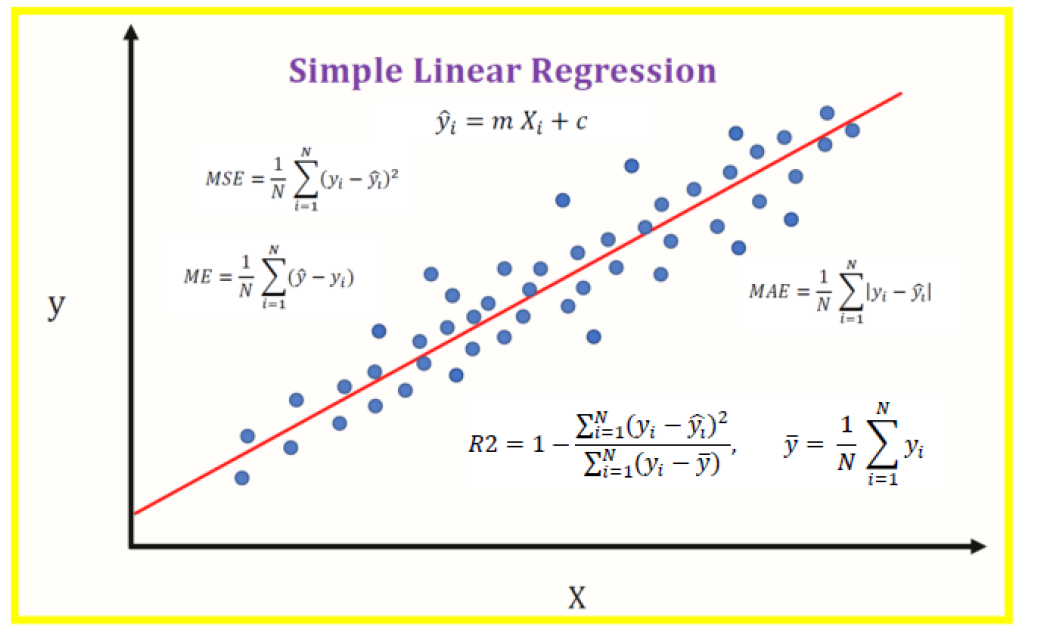


In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 11795.679654680513
R-squared: 0.9595576697553811
Mean Absolute Error: 106.03345280764552




```
Me: What is number of sample get increase whether MSE | MAE will increase or decrease ?

Me: If r2_score is +ve what it means


Me: Can r2_score be -ve ?

Me: High r2_score, what it indicates ?

Me: low r2_score, what it indicates ?

Me: What are the assumptions of a linear regression model?

Me: What are outliers? How do you detect and treat them? How do you deal with outliers in a linear regression model?

Me: How do you determine the best fit line for a linear regression model?

Me: What is the difference between simple and multiple linear regression?

Me: What is linear Regression Analysis?

Me: What is multicollinearity and how does it affect linear regression analysis?

Me: What is the difference between linear regression and logistic regression?

Me: What are the common types of errors in linear regression analysis?

Me: What is the difference between a dependent and independent variable in linear regression?

Me: How do you measure the strength of a linear relationship between two variables?

Me: What is linear regression, and how does it work?

Me: What is the difference between linear regression and non-linear regression?

Me: What are the common techniques used to improve the accuracy of a linear regression model?

Me: What is a residual in linear regression and how is it used in model evaluation?



```





```
Me: What is the difference between correlation and regression?

Me: How to find RMSE and MSE?

Me: How do you test for autocorrelation in a linear regression model?

Me: What are the common challenges faced when building a linear regression model?

Me: How do you choose the right variables for a linear regression model?

Me: What is the role of regularization techniques in preventing overfitting in linear regression?


Me: Can you explain the concept of overfitting in linear regression?

Me: What are the limitations of linear regression?

Me: What are the possible ways of improving the accuracy of a linear regression model?

Me: Can you explain the concept of bias-variance tradeoff in linear regression?

Me: What is the performance of the model after adding a non important feature to a linear regression model?

Me: What is the primary difference between R squared and adjusted R squared?

ME: Explain the Gradient Descent algorithm with respect to linear regression?

```

